[nltk_data] Downloading package stopwords to C:\Users\Devendra
[nltk_data]     Nemade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Devendra
[nltk_data]     Nemade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vectorizing the text data...
Cluster centers: [[ 8.83250684e-02  5.11340536e-02  3.93078253e-02 -2.02322304e-02
   3.39463465e-02  1.64819136e-02  5.32979099e-03 -1.74068473e-03
   7.07331821e-02  1.42791778e-01 -6.78737834e-02  2.71042082e-02
  -5.16655855e-02  6.26252368e-02 -7.90543202e-03 -2.76548099e-02
  -2.47742981e-02  4.43982407e-02  1.22185521e-01  7.27583244e-02
  -3.60615440e-02 -8.14564601e-02  5.64628877e-02  1.37162939e-01
   6.19409233e-02 -2.95440350e-02 -5.83093055e-03  3.53416032e-03
   2.53882632e-02 -4.71595768e-03  4.48102802e-02  5.97398579e-02
   6.80946112e-02  4.39285897e-02 -5.58003746e-02 -2.69097351e-02
   2.47797761e-02 -9.93231218e-03  4.21154760e-02  2.99877729e-02
   1.32625699e-02 -3.74165457e-03  6.04752637e-03  3.48856449e-02
  -1.52476933e-02  1.76186860e-02 -2.52543259e-02  2.91883051e-02
  -5.97220287e-03 -3.15329246e-02  9.64719569e-04 -1.91062279e-02
  -1.79625861e-02  1.94026940e-02  2.59725396e-02 -8.28063115e-03
   2.05516303e-03  2.67644529e

C:\Users\Devendra Nemade\AppData\Local\Temp\ipykernel_14288\773816082.py:250: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Devendra Nemade\AppData\Local\Temp\ipykernel_14288\773816082.py:252: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


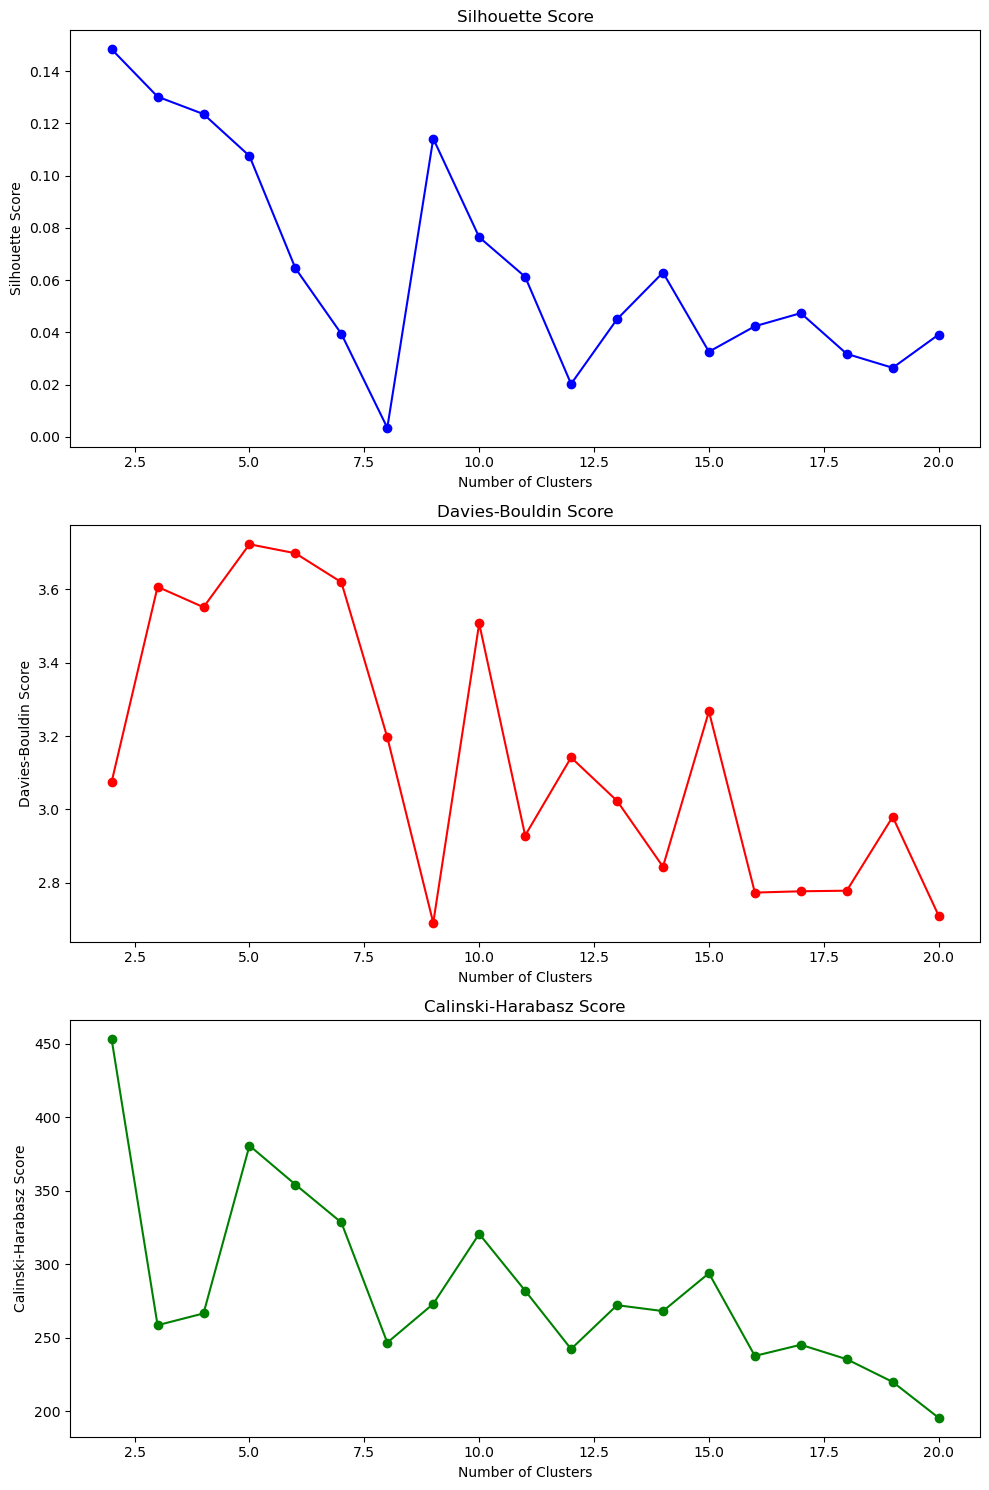

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:





# In[1]:


import numpy as np
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string


# In[2]:


# Compute inertia and assign labels to closest centroid
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

def compute_inertia(centroids, data, threshold=100000, distance_metric='manhattan'):
    # Choose distance metric
    if distance_metric == 'euclidean':
        distances = euclidean_distances(data, centroids)
    elif distance_metric == 'manhattan':
        distances = manhattan_distances(data, centroids)
    else:
        raise ValueError("Unsupported distance metric. Choose 'euclidean' or 'manhattan'.")

    labels = np.argmin(distances, axis=1)
    min_distances = np.min(distances, axis=1)

    # Assign -1 for distances greater than threshold
    labels[min_distances > threshold] = -1

    # Compute inertia for assigned data points
    assigned_data_points = data[labels != -1]
    if len(assigned_data_points) > 0:
        assigned_labels = labels[labels != -1]
        inertia = np.sum((assigned_data_points - centroids[assigned_labels]) ** 2)
    else:
        inertia = 0

    # Calculate additional metrics if needed
    num_outliers = np.sum(labels == -1)
    average_distance = np.mean(min_distances[labels != -1]) if len(assigned_data_points) > 0 else 0

    return inertia


# In[3]:


class GreyWolf:
    def __init__(self, data, n_clusters):
        self.position = data[np.random.choice(data.shape[0], n_clusters, replace=False), :]
        self.score = float('inf')


# In[23]:


def gwo_kmeans(data, n_clusters, n_wolves=10, max_iter=100,kmeans_interval=20):
    wolves = [GreyWolf(data, n_clusters) for _ in range(n_wolves)]

    alpha, beta, delta = None, None, None

    for _ in range(max_iter):
        # Calculate fitness for each wolf
        for wolf in wolves:
            wolf.score = compute_inertia(wolf.position, data)
            if alpha is None or wolf.score < alpha.score:
                alpha, beta, delta = wolf, alpha, beta
            elif beta is None or wolf.score < beta.score:
                beta, delta = wolf, beta
            elif delta is None or wolf.score < delta.score:
                delta = wolf

        # Update positions
        a = 2 - 2 * _ / max_iter  # Decrease linearly from 2 to 0
        for wolf in wolves:
            for i in range(n_clusters):
                wolf.position[i] = (alpha.position[i] - a * abs(alpha.position[i] - wolf.position[i]) +
                                    beta.position[i] - a * abs(beta.position[i] - wolf.position[i]) +
                                    delta.position[i] - a * abs(delta.position[i] - wolf.position[i])) / 3
                        # KMeans refinement at specified intervals
        if i % kmeans_interval == 0 and i != 0:
            # Using current global best as initial centroids for KMeans refinement
            kmeans = KMeans(n_clusters=n_clusters, init=global_best_position, n_init=1)
            kmeans.fit(data)
            refined_centroids = kmeans.cluster_centers_

            # Update global best if KMeans refinement improves inertia
            refined_inertia, _ = compute_inertia_and_labels(refined_centroids, data)
            if refined_inertia < global_best_score:
                global_best_score = refined_inertia
                global_best_position = refined_centroids

    final_kmeans = KMeans(n_clusters=n_clusters, init=np.array(alpha.position), n_init=1, max_iter=300)
    final_kmeans.fit(data)
    return final_kmeans


# In[5]:


newsgroups_dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), random_state=42)


# In[6]:


nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords, stemmer, and punctuation set
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)
stemmer = PorterStemmer()


# In[7]:


def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lowercase, remove punctuation, remove stopwords, and stem
    processed_tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stop_words and word not in punctuation_set]
    # Re-join processed tokens into a single string
    return ' '.join(processed_tokens)


# In[8]:


processed_data = [preprocess_text(doc) for doc in newsgroups_dataset.data]
# Use TfidfVectorizer to convert the raw text into TF-IDF features
print("Vectorizing the text data...")
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_data)
n_components = 100
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)


# In[9]:


if tfidf_matrix_reduced.dtype == 'float64':
    tfidf_matrix_reduced = tfidf_matrix_reduced.astype('float32')


# In[24]:


n_clusters = 2
kmeans = gwo_kmeans(tfidf_matrix_reduced, n_clusters)
print("Cluster centers:", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)
#GWO-Kmeans on 20newsgroups


# In[25]:


silhouette = silhouette_score(tfidf_matrix_reduced, kmeans.labels_)
davies_bouldin = davies_bouldin_score(tfidf_matrix_reduced, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(tfidf_matrix_reduced, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


# In[29]:


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
Labels_save=[]
for n_clusters in range(2, 21):
    # Run PSO-KMeans with the current number of clusters
    kmeans =  gwo_kmeans(tfidf_matrix_reduced, n_clusters)
    
    # Calculate metrics
    silhouette = silhouette_score(tfidf_matrix_reduced, kmeans.labels_)
    print(silhouette)
    davies_bouldin = davies_bouldin_score(tfidf_matrix_reduced, kmeans.labels_)
    calinski_harabasz = calinski_harabasz_score(tfidf_matrix_reduced, kmeans.labels_)
    
    # Store metrics
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    calinski_harabasz_scores.append(calinski_harabasz)
#     pca = PCA(n_components=2)
#     pca_data = pca.fit_transform(tfidf_matrix_reduced)

# # Visualizing the clusters
#     plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_)
#     plt.title(f'PCA of KMeans Clusters ({n_clusters} Clusters)')
#     plt.show()


# In[30]:


import matplotlib.pyplot as plt
# Plotting the metrics
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Silhouette Score
axs[0].plot(range(2, 21), silhouette_scores, marker='o', linestyle='-', color='blue')
axs[0].set_title('Silhouette Score')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
plt.savefig("Silhouette Score_News_countGWo-Kmeans.png")

# Davies-Bouldin Score
axs[1].plot(range(2, 21), davies_bouldin_scores, marker='o', linestyle='-', color='red')
axs[1].set_title('Davies-Bouldin Score')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Davies-Bouldin Score')
plt.tight_layout()
plt.savefig("Davies-Bouldin Score_News_countGWo-Kmeans.png")
# Calinski-Harabasz Score
axs[2].plot(range(2, 21), calinski_harabasz_scores, marker='o', linestyle='-', color='green')
axs[2].set_title('Calinski-Harabasz Score')
axs[2].set_xlabel('Number of Clusters')
axs[2].set_ylabel('Calinski-Harabasz Score')
plt.tight_layout()
plt.savefig("Calinski-Harabasz Score_News_countGWo-Kmeans.png")
plt.tight_layout()
plt.show()


# In[31]:


import pandas as pd
data = {'silhouette_scores':silhouette_scores,'davies_bouldin_scores': davies_bouldin_scores,
        'calinski_harabasz_scores': calinski_harabasz_scores}
df=pd.DataFrame(data,index=range(2, 21))
df


# In[32]:


df.to_csv('News_TFIDF_GWOR-Kmeans.csv')


# In[ ]:





# In[ ]:




